In [48]:
import pandas as pd
import os
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
path = "../specific/daily"
list_pq = [os.path.join(path, i) for i in os.listdir(path)]
list_df = [pd.read_parquet(i) for i in list_pq]
daily = pd.concat(list_df)
list_index = {
            'DXY Curncy': '美元指數',
            'US10YT': '美10債利率',
            'TWSE Index': '台灣加權指數',
            'TWOTCI Index': '台灣櫃買指數',
            'SOX Index': '費城半導體指數',
            'CCMP Index': '那斯達克指數',
            'NQ1 Index': '那斯達克指數期貨'
            }
data1 = daily[daily['code'].isin(list(list_index.keys())[:])]
data = data1.pivot(index='da', columns='code', values='cl').sort_index(ascending=True)
data.index = pd.to_datetime(data.index)
def plot_turbulences(data, resample='ME'):
    pct = data.pct_change(fill_method=None)
    pct = pct.resample(resample).sum()
    pct.index = pct.index.strftime("%y")
    init = 12
    dates = pct.index[init:] 
    turbulences = [0.0] * len(dates)
    for i in range(len(dates)):
        mean = np.array(pct.mean())
        cov = np.array(pct.iloc[i:init+i].cov())
        pct_current = np.array(pct.iloc[init+i])
        
        turbulence = (pct_current - mean) @ cov @ (pct_current - mean).T
        turbulences[i] = turbulence
    df_test = pd.DataFrame(turbulences, index=dates, columns=["turbulence"])
    df_test.dropna(inplace=True)
    
    # 6 main indices
    fig,ax = plt.subplots(figsize=(15,5))
    df_test.plot(kind='bar',ax=ax,stacked=False, width=1)
    plt.xticks(rotation=0) 
    ticks = plt.gca().get_xticks()
    plt.gca().set_xticks(ticks[ticks.astype(int) % 12 == 0])
    plt.show()

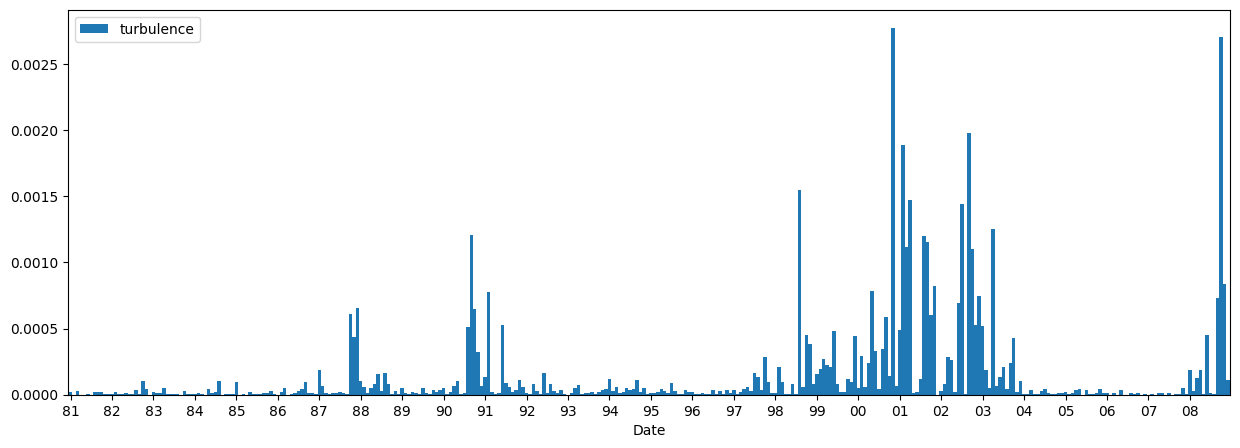

In [49]:
# 6 main indices
ticker_symbols = ['^GSPC', '^DJI', '^IXIC', '^FTSE', '^GDAXI', '^N225']
data_6_main_indices = yf.download(ticker_symbols, start='1980-01-01', end='2009-01-01', progress=False)['Adj Close']
plot_turbulences(data_6_main_indices)

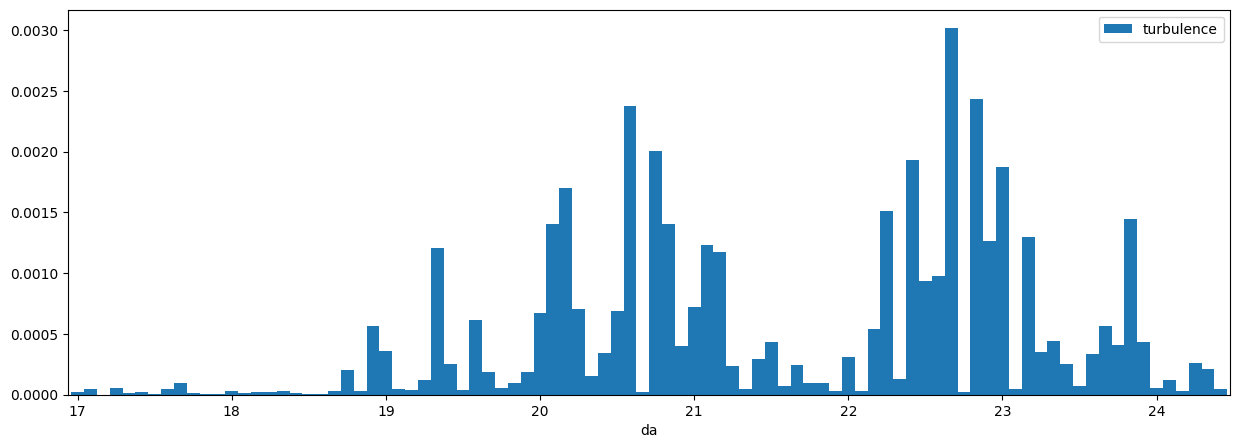

In [50]:
plot_turbulences(data)


In [41]:
# scater plot
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names).iloc[:, :2]
df['target'] = iris.target
df_plot = df[df['target'].isin([0, 1])]

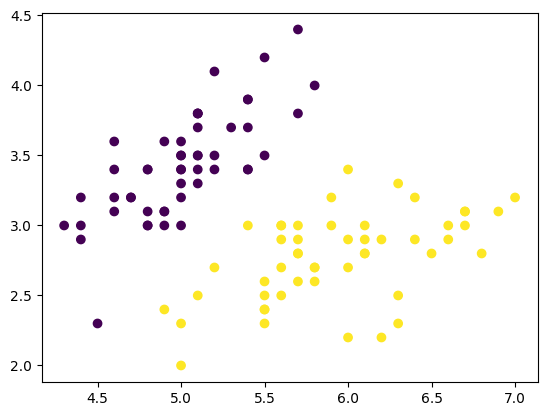

In [31]:
plt.scatter(df_plot.iloc[:, 0], df_plot.iloc[:, 1], c=df_plot['target'])